In [1]:
%load_ext rpy2.ipython
%R library(dplyr); library(ggplot2)

//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘dplyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  res = super(Function, self).__call__(*new_args, **new_kwargs)
//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  res = super(Function, self).__call__(*new_args, **new_kwargs)


array(['ggplot2', 'dplyr', 'tools', 'stats', 'graphics', 'grDevices',
       'utils', 'datasets', 'methods', 'base'], 
      dtype='|S9')

In [13]:
%%R
df <- read.table("../data/Comparative_paired_vs_single_recruit.csv", header=TRUE, sep=",")

In [29]:
%%R
df %>% mutate(sag_mg=paste(sag, metagenome, sep="--")) -> df
head(df)

         sag metagenome Percent_scaffolds_with_any_coverage
1 AAA008-D05 Japan_1000                                 100
2 AAA286-M02 Japan_1000                                 100
3 AAA288-L16 Japan_1000                                 100
4 AB-219-C22 Japan_1000                                  NA
5 AB-629-B06 Japan_1000                                 100
6 AB-629-B18 Japan_1000                                 100
  Percent_of_reference_bases_covered Average_coverage total_reads_recruited
1                           30.23488        0.4349125                   865
2                           25.78875        0.2792376                  1619
3                           27.60699        0.3866894                  2549
4                            0.00000        0.0000000                     0
5                           24.14147        0.2742823                   648
6                           30.42522        0.4028163                  2903
  mg_wgs_technology mg_read_count sag_completene

In [36]:
%%R
single <- df %>% filter(paired_or_single=="single") %>% .[,c(12,13,15)]
joined <- df %>% filter(paired_or_single=="paired") %>% .[,c(12,13,15)]
colnames(single)[c(1,2)] <- c("reads_per_mbp_single","prop_reads_per_mbp_single")
df2 <- merge(single, joined, by = "sag_mg")
head(df2)

                      sag_mg reads_per_mbp_single prop_reads_per_mbp_single
1     AAA008-D05--Japan_1000            1421.8228               0.000501233
2 AAA008-D05--Mex_OMZ_St6_85             563.7979               0.000209713
3     AAA286-M02--Japan_1000            1066.0833               0.000375824
4 AAA286-M02--Mex_OMZ_St6_85              49.3862               0.000018400
5     AAA288-L16--Japan_1000            1226.8887               0.000432513
6 AAA288-L16--Mex_OMZ_St6_85             641.1204               0.000238474
  reads_per_mbp prop_mgreads_per_mbp
1     973.08563          0.001440791
2     479.96791          0.000214104
3     720.37997          0.001066624
4      38.85047          0.000017300
5     832.20504          0.001232197
6     546.78133          0.000243908


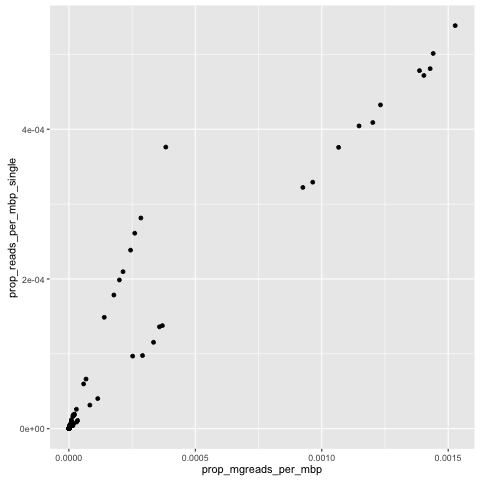

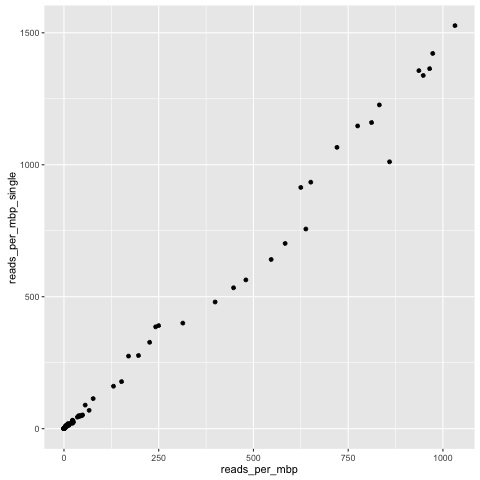

In [41]:
%%R
p1<- ggplot(df2, aes(prop_mgreads_per_mbp, prop_reads_per_mbp_single)) + geom_point()
plot(p1)
p2 <- ggplot(df2, aes(reads_per_mbp, reads_per_mbp_single)) + geom_point() 
plot(p2)

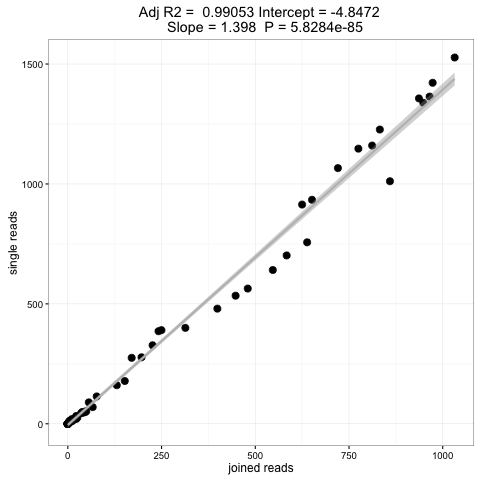

In [31]:
%%R
# from: https://susanejohnston.wordpress.com/2012/08/09/a-quick-and-easy-function-to-plot-lm-results-in-r/
ggplotRegression <- function (fit) {

require(ggplot2)

ggplot(fit$model, aes_string(x = names(fit$model)[2], y = names(fit$model)[1])) + 
  geom_point(size=3) +
  stat_smooth(method = "lm", col = "grey") +
  labs(title = paste("Adj R2 = ",signif(summary(fit)$adj.r.squared, 5),
                     "Intercept =",signif(fit$coef[[1]],5 ),"\n",
                     " Slope =",signif(fit$coef[[2]], 5),
                     " P =",signif(summary(fit)$coef[2,4], 5)))
}

fit1 <- lm(reads_per_mbp_single ~ reads_per_mbp, data = df2)
ggplotRegression(fit1)+theme_bw()+labs(x="joined reads", y="single reads")